In [1]:
#import packages
import time
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline

In [2]:
#Read in data from a data file to data_df in DateFrame format

## Type your code here to import data from poly_data.csv to data_df
#########################################################
data_df=pd.read_csv('poly_data.csv')
#########################################################


#verify the dataframe is imported correctly 
print(data_df.head(6))

   Unnamed: 0        X1         X2            y
0           0  1.764052  33.328661  1598.229564
1           1  0.400157   1.183124  -626.277403
2           2  0.978738  27.434845   417.084623
3           3  2.240893  11.530311   113.742012
4           4  1.867558  29.672567  1266.834421
5           5 -0.977278  38.525353   684.595541


C:\Users\Sonupradheen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


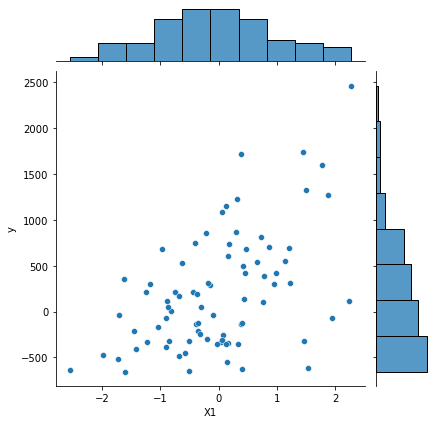

In [3]:
#joint plot (or scatter plot) of X1 and y
sns.jointplot(data_df['X1'], data_df['y'])

C:\Users\Sonupradheen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


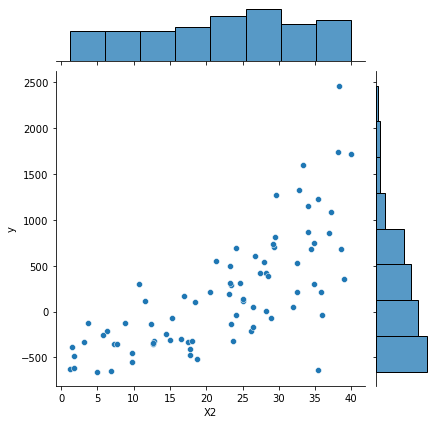

In [4]:
#joint plot (or scatter plot) of X2 and y
sns.jointplot(data_df['X2'], data_df['y'])

C:\Users\Sonupradheen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


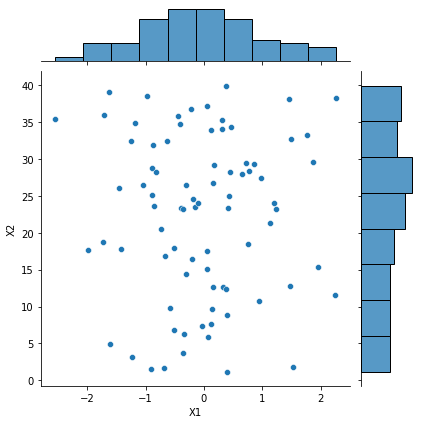

In [5]:
#joint plot (or scatter plot) of X1 and X2
sns.jointplot(data_df['X1'], data_df['X2'])

In [6]:
# split the data into training and testing datasets
# the percentage of training data is 75%

#split point 
percentage_for_training = 0.75

#type your code here
#number of training data 
#########################################################
number_of_training_data = int(percentage_for_training*len(data_df))
#########################################################


#create training and testing datasets
train_df  = data_df[0:number_of_training_data]
test_df = data_df[number_of_training_data:]
print(train_df.shape)
print(test_df.shape)

(60, 4)
(20, 4)


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#set the degree to 3, you can try a larger number if you like
#for degree = 3, we will generate 9 features. 
#open the link below to understand what these features are 
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html  
polynomial_features = PolynomialFeatures(degree=3)

In [8]:
X_poly = polynomial_features.fit_transform(data_df[['X1','X2']])

#type your code here to
#extract X for training and testing from the data frames
#########################################################
X_train = X_poly[0:number_of_training_data]
X_test = X_poly[number_of_training_data:]
#########################################################

In [9]:
print(X_poly)
print(X_train)

[[ 1.00000000e+00  1.76405235e+00  3.33286611e+01  3.11188068e+00
   5.87935029e+01  1.11079965e+03  5.48952041e+00  1.03714817e+02
   1.95950873e+03  3.70214652e+04]
 [ 1.00000000e+00  4.00157208e-01  1.18312357e+00  1.60125791e-01
   4.73435426e-01  1.39978139e+00  6.40754897e-02  1.89448598e-01
   5.60132612e-01  1.65611435e+00]
 [ 1.00000000e+00  9.78737984e-01  2.74348449e+01  9.57928042e-01
   2.68515248e+01  7.52670717e+02  9.37560560e-01  2.62806073e+01
   7.36667420e+02  2.06494044e+04]
 [ 1.00000000e+00  2.24089320e+00  1.15303110e+01  5.02160233e+00
   2.58381954e+01  1.32948071e+02  1.12528745e+01  5.79006364e+01
   2.97922427e+02  1.53293260e+03]
 [ 1.00000000e+00  1.86755799e+00  2.96725669e+01  3.48777285e+00
   5.54152393e+01  8.80461224e+02  6.51361805e+00  1.03491173e+02
   1.64431239e+03  2.61255445e+04]
 [ 1.00000000e+00 -9.77277880e-01  3.85253533e+01  9.55072054e-01
  -3.76499756e+01  1.48420284e+03 -9.33370793e-01  3.67944883e+01
  -1.45047861e+03  5.71794389e+04

In [10]:
# mse() calculates mean square error of a model on given X and y
def mse(X, y, model):
    return  ((y-model.predict(X))**2).sum()/y.shape[0]


In [11]:
# use all the features to train the linear model 
lm = LinearRegression()
lm.fit(X_train, train_df['y'])
train_mse = mse(X_train, train_df['y'], lm)
print("Training Data Set's MSE is: \t", train_mse)
test_mse = mse(X_test, test_df['y'], lm)
print("Testing Data Set's MSE is : \t", test_mse)

Training Data Set's MSE is: 	 34228.56230613586
Testing Data Set's MSE is : 	 43855.495846941005


In [14]:
#import lasso
#lasso is controlled by a parameter alpha.
#by fine tuning this parameter, we can control the number of features
from sklearn.linear_model import Lasso
#Train the model, try different alpha values.
Lasso_model = Lasso(alpha=0.15,normalize=True, max_iter=1e5, )
Lasso_model.fit(X_train, train_df['y'])

Lasso(alpha=0.15, max_iter=100000.0, normalize=True)

In [15]:
Lasso_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  2.01175754e+01, -1.25276464e+01,
        4.22700925e+00,  0.00000000e+00,  1.29092616e+01, -0.00000000e+00,
        2.57442481e-01,  1.66306861e-02])

In [16]:
#let's see the train_mse and test_mse from Lasso when 
#alpha = 0.15
train_mse = mse(X_train, train_df['y'], Lasso_model)
print("Training Data Set's MSE is: \t", train_mse)
test_mse = mse(X_test, test_df['y'], Lasso_model)
print("Testing Data Set's MSE is : \t", test_mse)

Training Data Set's MSE is: 	 34475.943856232145
Testing Data Set's MSE is : 	 40452.12277027026


In [17]:
#let's try a large range of values for alpha first
#create 50 alphas from 100 to 0.00001 in logspace
alphas = np.logspace(2, -5, base=10, num=50)
alphas

array([1.00000000e+02, 7.19685673e+01, 5.17947468e+01, 3.72759372e+01,
       2.68269580e+01, 1.93069773e+01, 1.38949549e+01, 1.00000000e+01,
       7.19685673e+00, 5.17947468e+00, 3.72759372e+00, 2.68269580e+00,
       1.93069773e+00, 1.38949549e+00, 1.00000000e+00, 7.19685673e-01,
       5.17947468e-01, 3.72759372e-01, 2.68269580e-01, 1.93069773e-01,
       1.38949549e-01, 1.00000000e-01, 7.19685673e-02, 5.17947468e-02,
       3.72759372e-02, 2.68269580e-02, 1.93069773e-02, 1.38949549e-02,
       1.00000000e-02, 7.19685673e-03, 5.17947468e-03, 3.72759372e-03,
       2.68269580e-03, 1.93069773e-03, 1.38949549e-03, 1.00000000e-03,
       7.19685673e-04, 5.17947468e-04, 3.72759372e-04, 2.68269580e-04,
       1.93069773e-04, 1.38949549e-04, 1.00000000e-04, 7.19685673e-05,
       5.17947468e-05, 3.72759372e-05, 2.68269580e-05, 1.93069773e-05,
       1.38949549e-05, 1.00000000e-05])

In [18]:
#use arrays to keep track of the MSE of each alpha used. 
train_mse_array =[]
test_mse_array=[]
#try each alpha
for alpha in alphas:
    #create Lasso model using alpha
    Lasso_model = Lasso(alpha=alpha,normalize=True, max_iter=1e5, )
    Lasso_model.fit(X_train, train_df['y'])
    #Calculate MSEs of train and test datasets 
    train_mse = mse(X_train, train_df['y'], Lasso_model)
    test_mse = mse(X_test, test_df['y'], Lasso_model)
    #add the MSEs to the arrays
    train_mse_array.append(train_mse)
    test_mse_array.append(test_mse)

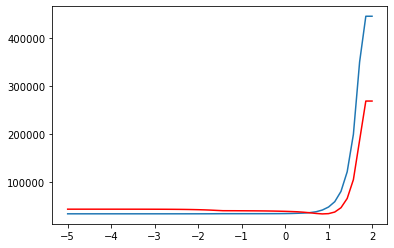

In [19]:
#plot the MSEs based on alpha values
#blue line is for training data
#red line is for the testing data
plt.plot(np.log10(alphas), train_mse_array)
plt.plot(np.log10(alphas), test_mse_array, color='r')

In [ ]:
#use arrays to keep track of the MSE of each alpha used. 
alphas = np.linspace(1, 10, 10000)
train_mse_array =[]
test_mse_array=[]
tol=20
alpha1=0
train_mse1=0
test_mse1=0
#try each alpha
for alpha in alphas:    
    #create Lasso model using alpha
    Lasso_model = Lasso(alpha=alpha,normalize=True, max_iter=1e5, )
    Lasso_model.fit(X_train, train_df['y'])    
    #Calculate MSEs of train and test datasets 
    train_mse = mse(X_train, train_df['y'], Lasso_model)
    test_mse = mse(X_test, test_df['y'], Lasso_model)   
    #add the MSEs to the arrays
    train_mse_array.append(train_mse)
    test_mse_array.append(test_mse)
    z=abs(train_mse-test_mse)
    if z<tol:
        tol=z
        alpha1=alpha
        train_mse1=train_mse
        test_mse1=test_mse       
print("The optimal Alpha is : ",alpha1)
print("Train MSE is : ",train_mse1)
print("Test MSE is : ",test_mse1)
plt.plot(alphas, train_mse_array)
plt.plot(alphas, test_mse_array, color='r')